In [ ]:
import pandas as pd

In [4]:
data = pd.read_csv('dataset.csv')

In [5]:
data.head()

,@id,@type,satelliteId,name,date,line1,line2,predictedEndOfLife,collisionWarning,line1_number,...,solar_panel_temperature,attitude_control_error,data_transmission_rate,thermal_control_status,satellite_health,time_to_EOL,eccentricity_norm,orbital_velocity_approx,motion_launch_interaction,is_critical_temperature
0,https://tle.ivanstanojevic.me/api/tle/83891,Tle,83891,SAT-83891,2024-07-02 23:07:18+00:00,1 83891U 55583S 24835.91561701 .60547942 0...,2 83891 86.5939 29.6163 3566279 35.7846 213.6...,2028-07-01 23:07:18+00:00,0,1.0,...,-13.074553,1.553314,10.600079,0,1,4402.426230,0.356628,1169.705386,50665.844013,False
1,https://tle.ivanstanojevic.me/api/tle/19720,Tle,19720,SAT-19720,2025-08-14 11:02:40+00:00,1 19720U 59601J 27560.86561056 .28552570 0...,2 19720 68.6440 115.4053 6085224 183.7848 243...,2032-08-12 11:02:40+00:00,0,1.0,...,-15.568622,2.593412,47.291054,1,0,4040.127315,0.608522,1391.809572,39793.065754,False
2,https://tle.ivanstanojevic.me/api/tle/41173,Tle,41173,SAT-41173,2023-12-10 03:48:42+00:00,1 41173U 72193E 20935.25035682 .20722637 0...,2 41173 38.3349 98.1626 4678738 247.6428 270....,2027-12-09 03:48:42+00:00,0,1.0,...,28.709230,2.680357,33.734476,1,0,3478.294617,0.467874,2211.907597,11176.343540,False
3,https://tle.ivanstanojevic.me/api/tle/77032,Tle,77032,SAT-77032,2022-05-29 14:53:01+00:00,1 77032U 97206Q 22163.18285877 .44172194 0...,2 77032 14.1555 94.0876 3614583 25.4091 108.9...,2026-05-28 14:53:01+00:00,0,1.0,...,24.760467,3.853990,86.476290,1,0,3298.742000,0.361458,2221.881364,23389.744992,False
4,https://tle.ivanstanojevic.me/api/tle/97490,Tle,97490,SAT-97490,2020-08-09 09:26:56+00:00,1 97490U 41704Q 25612.84718574 .90717141 0...,2 97490 55.1060 145.7159 4095126 87.6548 290....,2027-08-08 09:26:56+00:00,0,1.0,...,-49.539970,2.589345,35.841325,0,1,4208.384092,0.409513,1279.980664,16412.712223,True


# **Visualisation des Données et Pre Processing**

In [7]:
data.dtypes

,0
@id,object
@type,object
satelliteId,int64
name,object
date,object
line1,object
line2,object
predictedEndOfLife,object
collisionWarning,int64
line1_number,float64


In [8]:
filtered_data = data.select_dtypes(exclude=['object'])

In [9]:
correlation_matrix = filtered_data.corr()

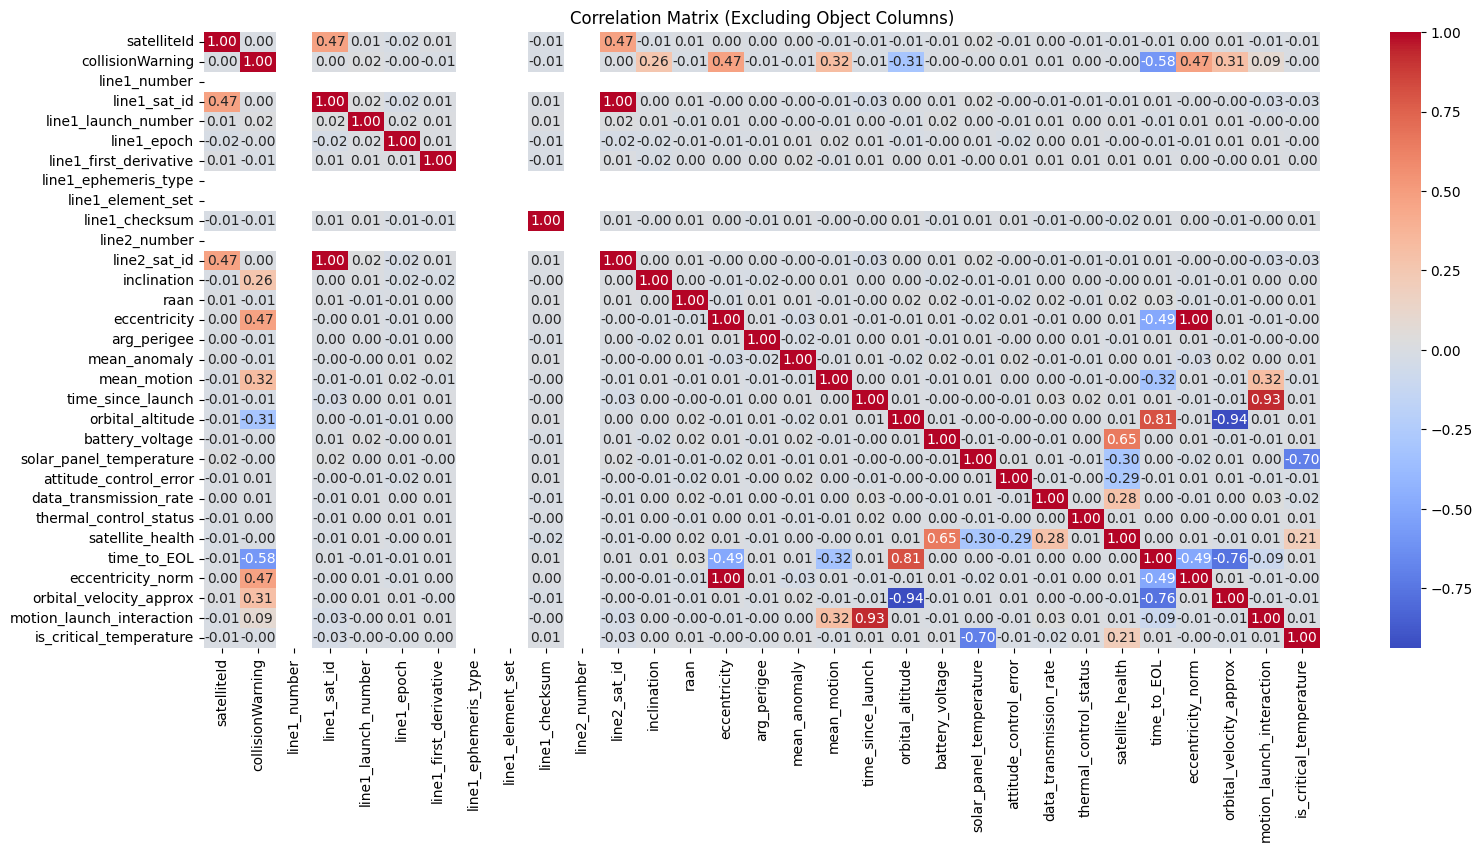

Excluded Columns (Object type):
Index(['@id', '@type', 'name', 'date', 'line1', 'line2', 'predictedEndOfLife',
       'line1_classification', 'line1_launch_piece', 'line1_constant',
       'line1_second_derivative'],
      dtype='object')


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Excluding Object Columns)")
plt.show()


excluded_columns = data.select_dtypes(include=['object']).columns
print("Excluded Columns (Object type):")
print(excluded_columns)

In [13]:
selected_features = [
    "time_since_launch",
    "orbital_altitude",
    "battery_voltage",
    "solar_panel_temperature",
    "attitude_control_error",
    "data_transmission_rate",
    "thermal_control_status",
    "satellite_health"
]
health_status_data = data[selected_features]

In [14]:
health_status_data.head()

,time_since_launch,orbital_altitude,battery_voltage,solar_panel_temperature,attitude_control_error,data_transmission_rate,thermal_control_status,satellite_health
0,3174,1827.203968,28.633451,-13.074553,1.553314,10.600079,0,1
1,3507,1290.566449,21.591647,-15.568622,2.593412,47.291054,1,0
2,860,510.982525,20.150880,28.709230,2.680357,33.734476,1,0
3,1294,506.405339,24.931839,24.760467,3.853990,86.476290,1,0
4,1130,1525.925008,24.321029,-49.539970,2.589345,35.841325,0,1


In [15]:
health_status_data['satellite_health'].value_counts()

,count
satellite_health,
1,4519
0,4481


In [16]:
health_status_data.isnull().sum()

,0
time_since_launch,0
orbital_altitude,0
battery_voltage,0
solar_panel_temperature,0
attitude_control_error,0
data_transmission_rate,0
thermal_control_status,0
satellite_health,0


In [47]:
from sklearn.model_selection import train_test_split

X = health_status_data.drop('satellite_health', axis=1)
y = health_status_data['satellite_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

In [38]:
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

In [25]:
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # No scaling for Random Forest
svm.fit(X_train_scaled, y_train)
xgb_model.fit(X_train, y_train)  # No scaling for XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
logreg_pred = logreg.predict(X_test_scaled)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test)


In [27]:
print("Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("SVM:")
print(classification_report(y_test, svm_pred))

print("XGBoost:")
print(classification_report(y_test, xgb_pred))

# Accuracy comparison
print("Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1345
           1       1.00      1.00      1.00      1355

    accuracy                           1.00      2700
   macro avg       1.00      1.00      1.00      2700
weighted avg       1.00      1.00      1.00      2700

Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1345
           1       0.96      0.97      0.97      1355

    accuracy                           0.97      2700
   macro avg       0.97      0.97      0.97      2700
weighted avg       0.97      0.97      0.97      2700

SVM:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1345
           1       0.98      0.99      0.99      1355

    accuracy                           0.99      2700
   macro avg       0.99      0.99      0.99      2700
weighted avg       0.99      0.99

In [28]:
import joblib

# Save Logistic Regression model
joblib.dump(logreg, 'logistic_regression_model_99.74_acc.pkl')

# Save Random Forest model
joblib.dump(rf, 'random_forest_model_96_acc.pkl')

# Save SVM model
joblib.dump(svm, 'svm_model_98_acc.pkl')

# Save XGBoost model
joblib.dump(xgb_model, 'xgboost_model_98_acc.pkl')

print("First set of models saved successfully!")


First set of models saved successfully!


# **We choose Logistic regression because it has a perfect score and all the params are good now we will check if there is an overfittin**

In [39]:
from sklearn.model_selection import cross_val_score
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
svm_cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

In [40]:
# Print cross-validation results
print(f"Logistic Regression - Cross-validation scores: {logreg_cv_scores}")
print(f"Random Forest - Cross-validation scores: {rf_cv_scores}")
print(f"SVM - Cross-validation scores: {svm_cv_scores}")
print(f"XGBoost - Cross-validation scores: {xgb_cv_scores}")

# Mean cross-validation scores
print(f"Logistic Regression - Mean CV accuracy: {logreg_cv_scores.mean()}")
print(f"Random Forest - Mean CV accuracy: {rf_cv_scores.mean()}")
print(f"SVM - Mean CV accuracy: {svm_cv_scores.mean()}")
print(f"XGBoost - Mean CV accuracy: {xgb_cv_scores.mean()}")

Logistic Regression - Cross-validation scores: [0.9968254  0.99920635 1.         0.9952381  0.9968254 ]
Random Forest - Cross-validation scores: [0.97222222 0.96269841 0.95555556 0.95952381 0.9547619 ]
SVM - Cross-validation scores: [0.98888889 0.98650794 0.98015873 0.97777778 0.98015873]
XGBoost - Cross-validation scores: [0.97301587 0.97301587 0.96825397 0.97619048 0.96746032]
Logistic Regression - Mean CV accuracy: 0.9976190476190476
Random Forest - Mean CV accuracy: 0.9609523809523809
SVM - Mean CV accuracy: 0.9826984126984127
XGBoost - Mean CV accuracy: 0.9715873015873016


In [42]:
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))



Logistic Regression Confusion Matrix:
[[1339    6]
 [   1 1354]]

Random Forest Confusion Matrix:
[[1293   52]
 [  42 1313]]

SVM Confusion Matrix:
[[1321   24]
 [  11 1344]]

XGBoost Confusion Matrix:
[[1312   33]
 [  21 1334]]


In [43]:
logreg.fit(X_train_scaled, y_train)

# Predict on the training data
logreg_train_pred = logreg.predict(X_train_scaled)

# Calculate train accuracy
logreg_train_accuracy = accuracy_score(y_train, logreg_train_pred)
logreg_test_accuracy = accuracy_score(y_test, logreg_pred)

print(f"Logistic Regression Training Accuracy: {logreg_train_accuracy}")
print(f"Logistic Regression Test Accuracy: {logreg_test_accuracy}")

Logistic Regression Training Accuracy: 0.9980952380952381
Logistic Regression Test Accuracy: 0.9974074074074074


In [49]:
#from the metrics used we can see that there is no overfitting
